<a href="https://colab.research.google.com/github/racode23/Tomto_deep_learning_project/blob/main/Tomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip install tensorflow-gpu==2.0.0-beta0
!pip install tensorflow_hub
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
from tensorflow import keras
keras.utils.custom_object_scope
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Concatenate,GlobalAveragePooling2D,Dropout
from tensorflow.keras.applications import VGG16

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-beta0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-beta0


In [1]:
import os
import matplotlib.pyplot as plt

In [7]:
pd.set_option("display.precision", 8)

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
data_root='/content/drive/MyDrive/DATASET/train'


In [11]:
IMAGE_SHAPE = (224, 224)
TRAINING_DATA_DIR = str(data_root)
print(TRAINING_DATA_DIR);
datagen_kwargs = dict(rescale=1./255, validation_split=.20)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
    TRAINING_DATA_DIR,
    subset="validation",
    shuffle=True,
    target_size=IMAGE_SHAPE
)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DATA_DIR,
    subset="training",
    shuffle=True,
    target_size=IMAGE_SHAPE
    )

/content/drive/MyDrive/DATASET/train
Found 2007 images belonging to 10 classes.
Found 8036 images belonging to 10 classes.


In [12]:
image_batch_train, label_batch_train = next(iter(train_generator))
print("Image batch shape: ", image_batch_train.shape)
print("Label batch shape: ", label_batch_train.shape)
dataset_labels = sorted(train_generator.class_indices.items(),
 key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 10)
['Tomato___Bacterial_Spot' 'Tomato___Early_Blight' 'Tomato___Late_Blight'
 'Tomato___Leaf_Mold' 'Tomato___Septoria_Leaf_Spot'
 'Tomato___Spider_Mites Two-Spotted_Spider_Mite' 'Tomato___Target_Spot'
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus' 'Tomato___Tomato_Mosaic_Virus'
 'Tomato___Healthy']


In [13]:
model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
    output_shape=[1280],
    trainable=False),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')])


In [14]:
model.build([None, 224, 224, 3])
model.summary()
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 2270794 (8.66 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [15]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)


In [ ]:
!pip install --upgrade tensorflow

In [16]:
hist = model.fit(
                 train_generator,
                 epochs=20,
                  verbose=1,
                 steps_per_epoch=steps_per_epoch,
                 validation_data=valid_generator,
                 validation_steps=val_steps_per_epoch).history

Epoch 1/20
252/252 [==============================] - 4244s 17s/step - loss: 1.1778 - acc: 0.5998 - val_loss: 0.6087 - val_acc: 0.8261
Epoch 2/20
252/252 [==============================] - 33s 133ms/step - loss: 0.6335 - acc: 0.7927 - val_loss: 0.4677 - val_acc: 0.8590
Epoch 3/20
252/252 [==============================] - 32s 126ms/step - loss: 0.5219 - acc: 0.8293 - val_loss: 0.4300 - val_acc: 0.8580
Epoch 4/20
252/252 [==============================] - 33s 130ms/step - loss: 0.4657 - acc: 0.8457 - val_loss: 0.3901 - val_acc: 0.8824
Epoch 5/20
252/252 [==============================] - 33s 132ms/step - loss: 0.4302 - acc: 0.8563 - val_loss: 0.3618 - val_acc: 0.8844
Epoch 6/20
252/252 [==============================] - 33s 129ms/step - loss: 0.4062 - acc: 0.8670 - val_loss: 0.3489 - val_acc: 0.8914
Epoch 7/20
252/252 [==============================] - 38s 153ms/step - loss: 0.3865 - acc: 0.8726 - val_loss: 0.3309 - val_acc: 0.8899
Epoch 8/20
252/252 [==============================] - 3

In [22]:
tf.keras.models.save_model(model,"/content/drive/MyDrive/DATASET/MobilenetModelnew")

AttributeError: ignored

In [23]:
tf.keras.models.save_model(model,"/content/drive/MyDrive/DATASET/firstmodel")

In [26]:
model1v2=tf.keras.models.load_model("/content/drive/MyDrive/DATASET/firstmodel")

NameError: ignored

In [28]:
val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 224, 224, 3)


In [29]:
tf_model_predictions_1 = model1v2.predict(val_image_batch)
tf_pred_dataframe_1 = pd.DataFrame(tf_model_predictions_1)
tf_pred_dataframe_1.columns = dataset_labels
print("Prediction results for the first elements")
tf_pred_dataframe_1.head()

1/1 [==============================] - 1s 605ms/step
Prediction results for the first elements


,Tomato___Bacterial_Spot,Tomato___Early_Blight,Tomato___Late_Blight,Tomato___Leaf_Mold,Tomato___Septoria_Leaf_Spot,Tomato___Spider_Mites Two-Spotted_Spider_Mite,Tomato___Target_Spot,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Mosaic_Virus,Tomato___Healthy
0,0.00051838,0.04731207,0.00166955,0.00030234,0.00534491,0.00074278,0.94385207,0.00000086,0.00001472,2.42250680e-04
1,0.03113955,0.20696744,0.73684818,0.00239813,0.00175831,0.00176551,0.01906802,0.00002857,0.00002634,1.59940033e-10
2,0.59943748,0.09345195,0.00104238,0.00063944,0.30518553,0.00000251,0.00010917,0.00000312,0.00011476,1.36500157e-05
3,0.00064340,0.61840570,0.16970722,0.13083085,0.00191012,0.01113308,0.06451759,0.00002198,0.00000178,2.82824761e-03
4,0.00000274,0.00002857,0.00005243,0.00006572,0.00003553,0.99940860,0.00040167,0.00000029,0.00000096,3.41406894e-06


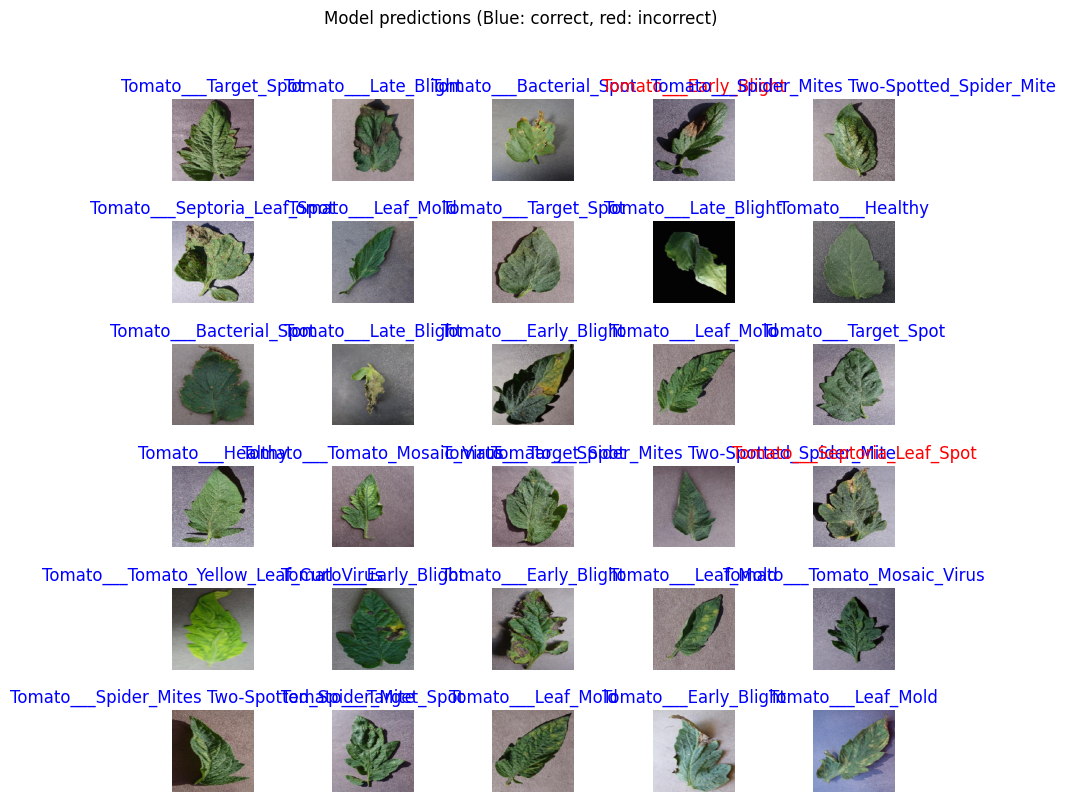

In [30]:
predicted_ids = np.argmax(tf_model_predictions_1, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "blue" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
  _ = plt.suptitle("Model predictions (Blue: correct, red: incorrect)")

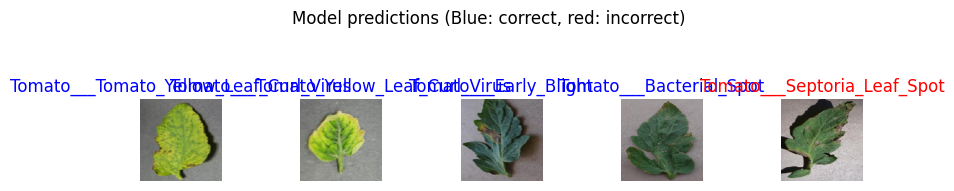

In [ ]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(5):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "blue" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
  _ = plt.suptitle("Model predictions (Blue: correct, red: incorrect)")

Text(0.5, 1.0, 'Tomato___Tomato_Mosaic_Virus')

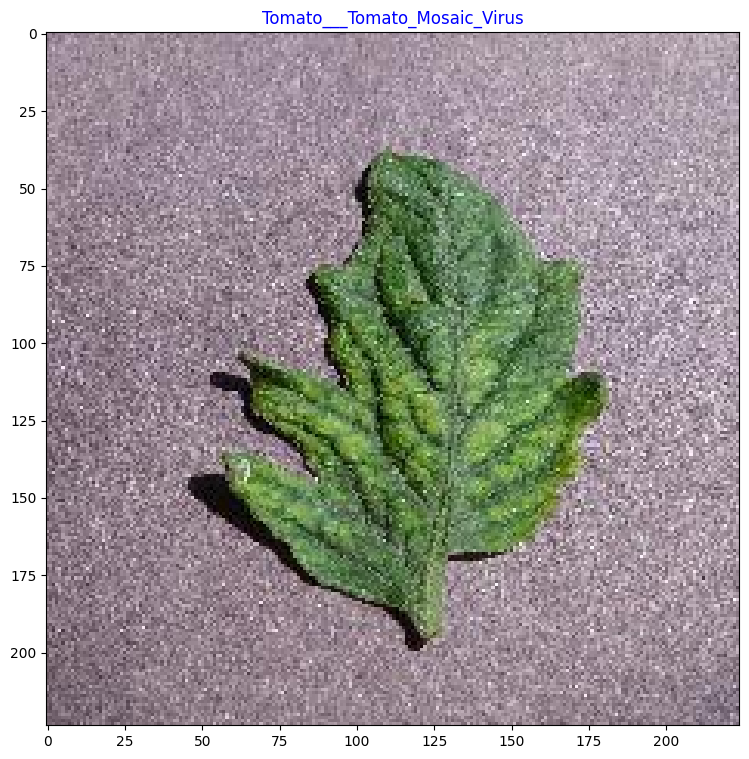

In [ ]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
n=11
plt.imshow(val_image_batch[n])
color = "blue" if predicted_ids[n] == true_label_ids[n] else "red"
plt.title(predicted_labels[n].title(), color=color)

In [12]:
model2 = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')])


In [13]:
model2.build([None, 224, 224, 3])
model2.summary()
model2.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)      

In [ ]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)


In [ ]:
hist2 = model2.fit(
                 train_generator,
                 epochs=20,
                  verbose=1,
                 steps_per_epoch=steps_per_epoch,
                 validation_data=valid_generator,
                 validation_steps=val_steps_per_epoch).history

In [ ]:
tf.saved_model.save(model2, "/content/drive/MyDrive/DATASET/con2")

In [ ]:
imported_model = tf.saved_model.load("/content/drive/MyDrive/DATASET/con2")

In [ ]:
val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 224, 224, 3)


In [ ]:
tf_model_predictions = model2.predict(val_image_batch)
tf_pred_dataframe = pd.DataFrame(tf_model_predictions)
tf_pred_dataframe.columns = dataset_labels
print("Prediction results for the first elements")
tf_pred_dataframe.head()

1/1 [==============================] - 0s 27ms/step
Prediction results for the first elements


,Tomato___Bacterial_Spot,Tomato___Early_Blight,Tomato___Late_Blight,Tomato___Leaf_Mold,Tomato___Septoria_Leaf_Spot,Tomato___Spider_Mites Two-Spotted_Spider_Mite,Tomato___Target_Spot,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Mosaic_Virus,Tomato___Healthy
0,2.27039114e-15,4.92470281e-06,3.61239252e-08,2.27030646e-02,4.93735582e-01,1.81310369e-10,1.20855418e-11,3.95366878e-10,4.83556449e-01,6.43297065e-16
1,8.61731256e-15,1.89640196e-11,3.69620723e-11,9.92043078e-06,1.96016387e-07,6.55878353e-07,1.78013715e-06,1.61542641e-13,9.99987483e-01,2.08012820e-13
2,2.33649320e-12,4.81010565e-10,4.41464088e-10,5.37028200e-09,1.82036027e-12,9.37770092e-05,9.99906182e-01,2.44507566e-13,3.31614758e-09,6.51756860e-16
3,1.87273330e-09,6.92776030e-06,3.30975212e-07,4.93985510e-08,7.39035357e-08,9.96871531e-01,3.12081375e-03,7.97398050e-11,1.44917189e-09,2.34595646e-07
4,1.30177950e-26,1.29342939e-14,4.94386303e-12,4.46474251e-18,5.41808554e-18,1.13200445e-08,9.98495340e-01,4.71230807e-26,4.87079554e-14,1.50463404e-03


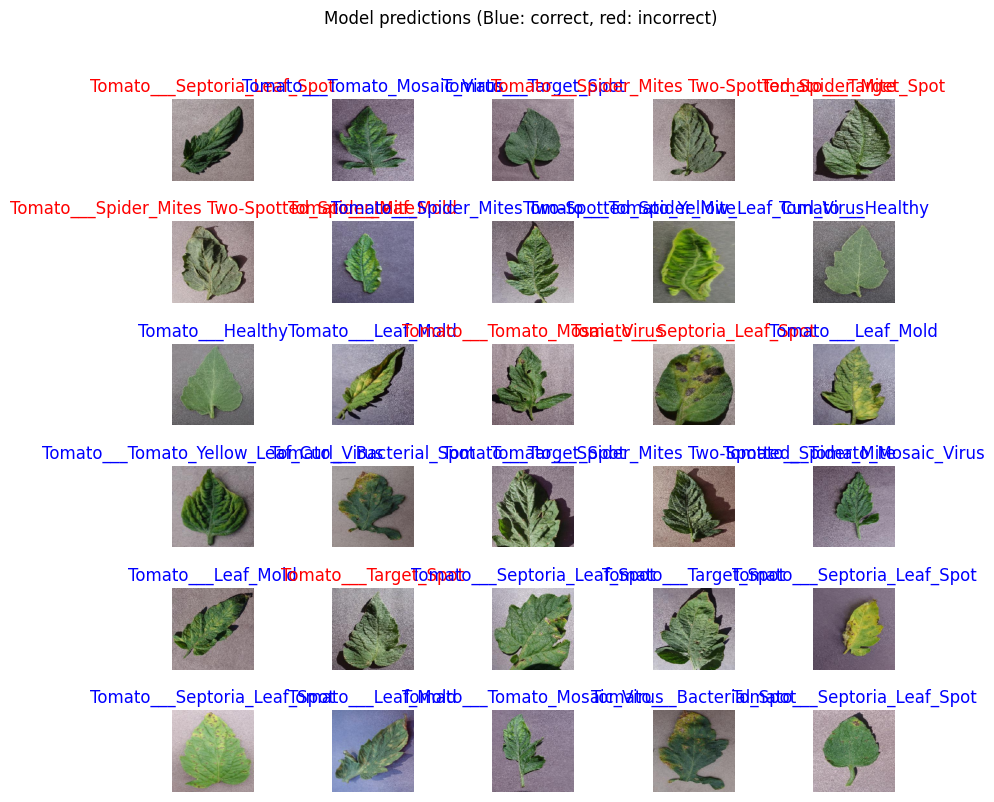

In [ ]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "blue" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
  _ = plt.suptitle("Model predictions (Blue: correct, red: incorrect)")

In [14]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [15]:
model3 = tf.keras.Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')])


In [16]:
model3.build([None, 224, 224, 3])
model3.summary()
model3.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['acc'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               3211392   
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 17927370 (68.39 MB)
Trainable params: 17927370 (68.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)


In [ ]:
hist3 = model3.fit(
                 train_generator,
                 epochs=20,
                  verbose=1,
                 steps_per_epoch=steps_per_epoch,
                 validation_data=valid_generator,
                 validation_steps=val_steps_per_epoch).history

Epoch 1/20
252/252 [==============================] - 16504s 65s/step - loss: 2.5489 - acc: 0.0925 - val_loss: 2.3026 - val_acc: 0.1031
Epoch 2/20
 95/252 [==========>...................] - ETA: 2:37:52 - loss: 2.3028 - acc: 0.1033

In [ ]:
tf.keras.saved_model.save(model3, "/content/drive/MyDrive/DATASET/vgg16_retrain")

NameError: ignored

In [ ]:
model3_v2 = tf.keras.saved_model.load("/content/drive/MyDrive/DATASET/vgg16_retrain")

In [ ]:
val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 224, 224, 3)


In [ ]:
tf_model_predictions_vgg16 = model3_v2.predict(val_image_batch)
tf_pred_dataframe_vg16 = pd.DataFrame(tf_model_predictions_vgg16)
tf_pred_dataframe_vg16.columns = dataset_labels
print("Prediction results for the first elements")
tf_pred_dataframe.head()

1/1 [==============================] - 0s 180ms/step
Prediction results for the first elements


,Tomato___Bacterial_Spot,Tomato___Early_Blight,Tomato___Late_Blight,Tomato___Leaf_Mold,Tomato___Septoria_Leaf_Spot,Tomato___Spider_Mites Two-Spotted_Spider_Mite,Tomato___Target_Spot,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Mosaic_Virus,Tomato___Healthy
0,0.09998915,0.09979099,0.09964072,0.0999369,0.10007445,0.09977259,0.09976657,0.09867384,0.10282315,0.09953169
1,0.09998915,0.09979099,0.09964072,0.0999369,0.10007445,0.09977259,0.09976657,0.09867384,0.10282315,0.09953169
2,0.09998915,0.09979099,0.09964072,0.0999369,0.10007445,0.09977259,0.09976657,0.09867384,0.10282315,0.09953169
3,0.09998915,0.09979099,0.09964072,0.0999369,0.10007445,0.09977259,0.09976657,0.09867384,0.10282315,0.09953169
4,0.09998915,0.09979099,0.09964072,0.0999369,0.10007445,0.09977259,0.09976657,0.09867384,0.10282315,0.09953169


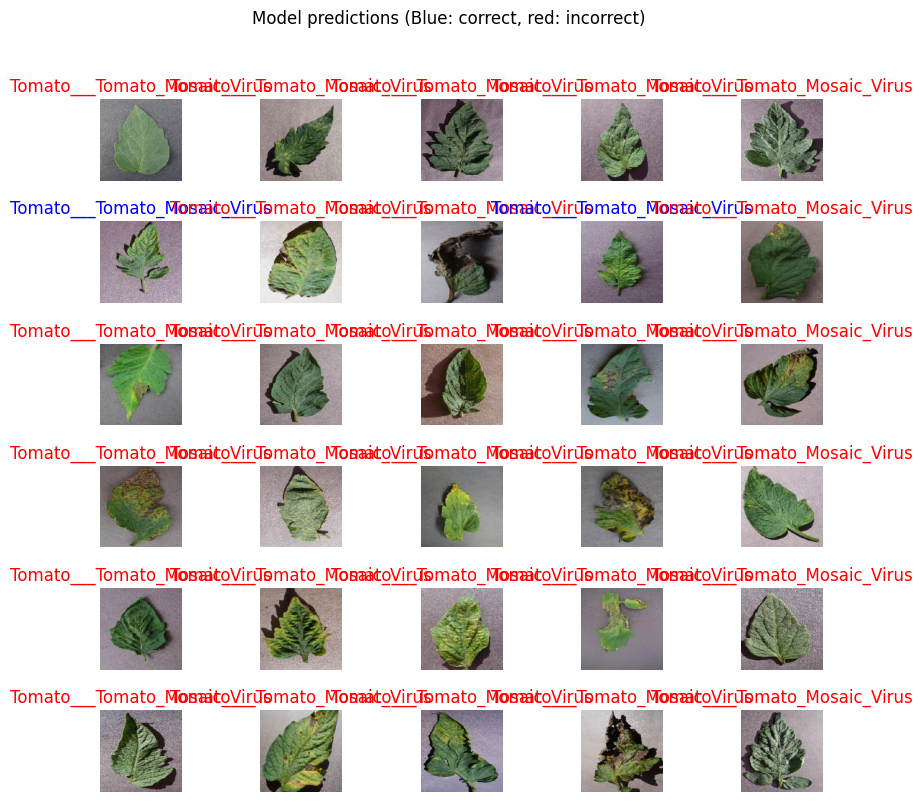

In [ ]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "blue" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
  _ = plt.suptitle("Model predictions (Blue: correct, red: incorrect)")

In [25]:
model4 = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Flatten(),
    Dense(train_generator.num_classes, activation='softmax')])

In [26]:
model4.build([None, 224, 224, 3])
model4.summary()
model4.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 128)      

In [27]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)

In [28]:
hist4 = model4.fit(
                 train_generator,
                 epochs=20,
                  verbose=1,
                 steps_per_epoch=steps_per_epoch,
                 validation_data=valid_generator,
                 validation_steps=val_steps_per_epoch).history

Epoch 1/20
252/252 [==============================] - 6079s 24s/step - loss: 2.0091 - acc: 0.2255 - val_loss: 1.7483 - val_acc: 0.3822
Epoch 2/20
252/252 [==============================] - 38s 152ms/step - loss: 1.5694 - acc: 0.4098 - val_loss: 1.2969 - val_acc: 0.5187
Epoch 3/20
252/252 [==============================] - 33s 130ms/step - loss: 1.2949 - acc: 0.5335 - val_loss: 1.0628 - val_acc: 0.6323
Epoch 4/20
252/252 [==============================] - 33s 130ms/step - loss: 1.1233 - acc: 0.5852 - val_loss: 0.9597 - val_acc: 0.6672
Epoch 5/20
252/252 [==============================] - 32s 128ms/step - loss: 0.9940 - acc: 0.6424 - val_loss: 0.7619 - val_acc: 0.7374
Epoch 6/20
252/252 [==============================] - 33s 130ms/step - loss: 0.9050 - acc: 0.6733 - val_loss: 0.7757 - val_acc: 0.7230
Epoch 7/20
252/252 [==============================] - 33s 129ms/step - loss: 0.8345 - acc: 0.6976 - val_loss: 0.6571 - val_acc: 0.7623
Epoch 8/20
252/252 [==============================] - 3

In [ ]:
tf.saved_model.save(model4, "/content/drive/MyDrive/DATASET/Model4")

In [31]:
tf.keras.models.save_model(model4,"/content/drive/MyDrive/DATASET/Model4_2")

In [32]:
model4v2=tf.keras.models.load_model("/content/drive/MyDrive/DATASET/Model4_2")

In [33]:
model4v2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 128)      

In [34]:
val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 224, 224, 3)


In [35]:
tf_model_predictions_model4 = model4v2.predict(val_image_batch)
tf_pred_dataframe_model4 = pd.DataFrame(tf_model_predictions_model4)
tf_pred_dataframe_model4.columns = dataset_labels
print("Prediction results for the first elements")
tf_pred_dataframe_model4.head()

1/1 [==============================] - 0s 400ms/step
Prediction results for the first elements


,Tomato___Bacterial_Spot,Tomato___Early_Blight,Tomato___Late_Blight,Tomato___Leaf_Mold,Tomato___Septoria_Leaf_Spot,Tomato___Spider_Mites Two-Spotted_Spider_Mite,Tomato___Target_Spot,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Mosaic_Virus,Tomato___Healthy
0,7.58895307e-14,2.52953186e-10,0.00000095,0.00000797,0.00038703,3.31422439e-06,2.76558731e-05,1.57035897e-13,9.99570668e-01,2.38644066e-06
1,1.58462328e-36,3.07144466e-19,0.00000003,0.99999964,0.00000033,1.16556582e-28,1.70235890e-18,1.21574328e-27,1.29321082e-10,9.85898409e-15
2,1.76277131e-01,3.76794924e-04,0.70290786,0.00002723,0.11780420,4.39163387e-07,9.51157490e-05,2.07089540e-03,3.78677090e-09,4.40224772e-04
3,6.01745211e-03,9.43541963e-05,0.00182402,0.00000031,0.00000336,4.23394219e-12,2.81036132e-12,9.92060542e-01,8.89648544e-13,7.87174484e-15
4,3.99797736e-03,3.29471892e-04,0.34956568,0.00189141,0.00072729,2.15460568e-06,1.13723372e-05,3.69910449e-05,6.67555042e-08,6.43437624e-01


In [ ]:
predicted_ids = np.argmax(tf_model_predictions_model4, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "blue" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
  _ = plt.suptitle("Model predictions (Blue: correct, red: incorrect)")